## Data Understanding


#### Import Pandas, Matplotlib & SQLite

In [2]:
import pandas as pd

In [3]:
import sqlite3

In [4]:
import matplotlib.pyplot as plt

#### Connect to IMDB Database

In [5]:
conn = sqlite3.connect('zippedData/im.db')

#### Create IMDB tables listing 

In [6]:
imdb_tables = '''

SELECT * FROM sqlite_master

'''

pd.read_sql_query(imdb_tables,conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


#### Storing Key IMDB Tables

In [7]:
movie_basics = pd.read_sql_query(''' SELECT * FROM movie_basics''',conn)
movie_basics.to_csv()
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [8]:
movie_ratings = pd.read_sql_query(''' SELECT * FROM movie_ratings ''',conn)
movie_ratings.to_csv()
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [9]:
movie_akas = pd.read_sql_query(''' SELECT * FROM movie_akas''',conn)
movie_akas.to_csv()
movie_akas.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [10]:
movies_agg = pd.read_sql_query('''
SELECT 
mr.movie_id
,mb.primary_title
,mb.original_title
,mb.genres
,mb.start_year
,averagerating
,numvotes
,(averagerating*numvotes) as total_weight

FROM movie_ratings mr
LEFT JOIN movie_basics mb
ON mr.movie_id = mb.movie_id

GROUP BY 1,2,3,4,5,6,7

ORDER BY total_weight DESC;

''',conn)

movies_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_id        73856 non-null  object 
 1   primary_title   73856 non-null  object 
 2   original_title  73856 non-null  object 
 3   genres          73052 non-null  object 
 4   start_year      73856 non-null  int64  
 5   averagerating   73856 non-null  float64
 6   numvotes        73856 non-null  int64  
 7   total_weight    73856 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


#### Import Earnings/Budget Data Files

In [11]:
movie_gross = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')
movie_gross.to_csv()
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [12]:
movie_budget = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
movie_budget.to_csv()
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [13]:
movie_budget.sort_values(by='domestic_gross').head(25)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
4381,82,"Oct 26, 2012",Mientras duermes,"$5,000,000",$0,"$9,109,597"
5108,9,"Nov 4, 2005",Wal-Mart: The High Cost of Low Price,"$1,500,000",$0,"$58,692"
5107,8,"Jul 20, 2018",Teefa in Trouble,"$1,500,000",$0,"$98,806"
5106,7,"Oct 17, 2014",Housebound,"$1,500,000",$0,"$236,863"
3157,58,"Dec 31, 2008",Bathory,"$15,000,000",$0,"$3,436,763"
2754,55,"Mar 8, 2016",Out of the Inferno,"$19,000,000",$0,$0
5061,62,"Aug 5, 1955",The Kingâs Thief,"$1,577,000",$0,$0
5047,48,"Feb 1, 2019",Braid,"$1,660,000",$0,"$80,745"
5037,38,"Apr 23, 2019",Living Dark: The Story of Ted the Caver,"$1,750,000",$0,$0
5033,34,"Oct 20, 2015",Beginnerâs Guide to Sex,"$1,800,000",$0,$0


#### Import Additional Data Tables (to be used if needed)

In [14]:
tmdb_data = pd.read_csv('./zippedData/tmdb.movies.csv.gz')
tmdb_data.to_csv()
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


## Data Wrangling

#### Create Movie Budget Table with Total Gross and Total Margin Calculations

In [15]:
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].map(lambda x: float(x.split('$')[1].replace(',','')))

In [16]:
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].map(lambda x: float(x.split('$')[1].replace(',','')))

In [17]:
movie_budget['production_budget'] = movie_budget['production_budget'].map(lambda x: float(x.split('$')[1].replace(',','')))

In [18]:
movie_budget['total_gross'] = movie_budget['domestic_gross'] + movie_budget['worldwide_gross']

In [19]:
movie_budget['total_margin_$'] = movie_budget['total_gross'] - movie_budget['production_budget']

In [20]:
movie_budget['total_margin_%'] = (movie_budget['total_margin_$']/movie_budget['production_budget'])*100

In [21]:
movie_budget['domestic_margin_$'] = movie_budget['production_budget'] - movie_budget['domestic_gross']

In [22]:
movie_budget['domestic_margin_%'] = (movie_budget['domestic_margin_$']/movie_budget['production_budget'])*100

In [23]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   total_gross        5782 non-null   float64
 7   total_margin_$     5782 non-null   float64
 8   total_margin_%     5782 non-null   float64
 9   domestic_margin_$  5782 non-null   float64
 10  domestic_margin_%  5782 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 497.0+ KB


In [24]:
movie_budget.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,total_margin_$,total_margin_%,domestic_margin_$,domestic_margin_%
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.111853e+09,732.200683,-335507625.0,-78.942971
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09,8.761278e+08,213.377435,169536125.0,41.289850
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08,-1.574753e+08,-44.992943,307237650.0,87.782186
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09,1.531420e+09,463.224389,-128405868.0,-38.840250
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09,1.619903e+09,511.010451,-303181382.0,-95.640815
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2.989973e+09,2.683973e+09,877.115505,-630662225.0,-206.098766
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2.726950e+09,2.426950e+09,808.983227,-378815482.0,-126.271827
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08,1.272841e+09,9.728408e+08,324.280283,-9420425.0,-3.140142
8,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,8.849695e+08,5.849695e+08,194.989835,70975705.0,23.658568
9,10,"Nov 6, 2015",Spectre,300000000.0,200074175.0,8.796209e+08,1.079695e+09,7.796951e+08,259.898366,99925825.0,33.308608


#### What does the correlation between production budget and total margin look like?

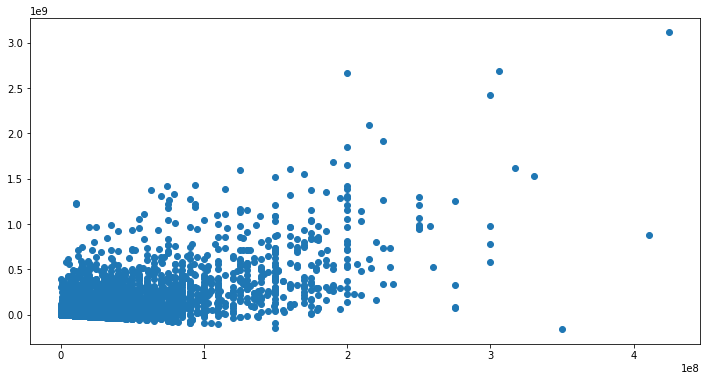

In [25]:
fig, ax = plt.subplots(figsize=(12,6))
x = movie_budget['production_budget']
y = movie_budget['total_margin_$']


ax.scatter(x,y)


#### What's the central tendency of movie budgets look like?

In [26]:
movie_budget.describe()

,id,production_budget,domestic_gross,worldwide_gross,total_gross,total_margin_$,total_margin_%,domestic_margin_$,domestic_margin_%
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000,5.782000e+03,5782.000000
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,1.333608e+08,1.017730e+08,678.370158,-1.028557e+07,-198.354021
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,2.399411e+08,2.108880e+08,5492.209049,4.992137e+07,2608.659060
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-1.574753e+08,-100.000000,-6.306622e+08,-179900.000000
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,6.448924e+06,-3.098222e+05,-20.287843,-1.778144e+07,-105.814816
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,4.605855e+07,2.499538e+07,165.931482,3.487755e+05,12.167378
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,1.506937e+08,1.111648e+08,489.317031,9.132757e+06,79.436711
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,3.536853e+09,3.111853e+09,359900.000000,3.072376e+08,100.000000


### Deep Dive into Genres - Over the Years 

In [27]:
genres = pd.DataFrame(movies_agg['genres'].value_counts())

genres.head(10)

,genres
Drama,11612
Documentary,10313
Comedy,5613
Horror,2692
"Comedy,Drama",2617
Thriller,1555
"Drama,Romance",1510
"Comedy,Romance",1236
"Comedy,Drama,Romance",1208
"Horror,Thriller",1004


In [28]:
movies_agg.isna().sum()

movie_id            0
primary_title       0
original_title      0
genres            804
start_year          0
averagerating       0
numvotes            0
total_weight        0
dtype: int64

In [29]:
## I'm replacing the missing genres with 'Unknown', since nulls represt only about 1% of total data

In [30]:
movies_agg['genres'].fillna("Unkown",inplace=True)
movies_agg.isna().sum()

movie_id          0
primary_title     0
original_title    0
genres            0
start_year        0
averagerating     0
numvotes          0
total_weight      0
dtype: int64

In [31]:
movies_agg['genres'].str.split(',',expand=True)

,0,1,2
0,Action,Adventure,Sci-Fi
1,Action,Thriller,None
2,Adventure,Drama,Sci-Fi
3,Drama,Western,None
4,Action,Adventure,Sci-Fi
...,...,...,...
73851,Comedy,None,None
73852,Comedy,None,None
73853,Comedy,None,None
73854,Animation,None,None


In [32]:
movies_agg

,movie_id,primary_title,original_title,genres,start_year,averagerating,numvotes,total_weight
0,tt1375666,Inception,Inception,"Action,Adventure,Sci-Fi",2010,8.8,1841066,16201380.8
1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,"Action,Thriller",2012,8.4,1387769,11657259.6
2,tt0816692,Interstellar,Interstellar,"Adventure,Drama,Sci-Fi",2014,8.6,1299334,11174272.4
3,tt1853728,Django Unchained,Django Unchained,"Drama,Western",2012,8.4,1211405,10175802.0
4,tt0848228,The Avengers,The Avengers,"Action,Adventure,Sci-Fi",2012,8.1,1183655,9587605.5
...,...,...,...,...,...,...,...,...
73851,tt9366716,DaGram,DaGram,Comedy,2018,1.2,5,6.0
73852,tt2447822,Momok jangan cari pasal!,Momok jangan cari pasal!,Comedy,2012,1.0,5,5.0
73853,tt6792126,Jak se mori revizori,Jak se mori revizori,Comedy,2018,1.0,5,5.0
73854,tt8426154,Pup Scouts,Pup Scouts,Animation,2018,1.0,5,5.0


In [33]:
movies_agg[['Genre_1','Genre_2','Genre_3']] = movies_agg['genres'].str.split(',',expand=True)
movies_agg.head(10)

,movie_id,primary_title,original_title,genres,start_year,averagerating,numvotes,total_weight,Genre_1,Genre_2,Genre_3
0,tt1375666,Inception,Inception,"Action,Adventure,Sci-Fi",2010,8.8,1841066,16201380.8,Action,Adventure,Sci-Fi
1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,"Action,Thriller",2012,8.4,1387769,11657259.6,Action,Thriller,None
2,tt0816692,Interstellar,Interstellar,"Adventure,Drama,Sci-Fi",2014,8.6,1299334,11174272.4,Adventure,Drama,Sci-Fi
3,tt1853728,Django Unchained,Django Unchained,"Drama,Western",2012,8.4,1211405,10175802.0,Drama,Western,None
4,tt0848228,The Avengers,The Avengers,"Action,Adventure,Sci-Fi",2012,8.1,1183655,9587605.5,Action,Adventure,Sci-Fi
5,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,"Biography,Crime,Drama",2013,8.2,1035358,8489935.6,Biography,Crime,Drama
6,tt1130884,Shutter Island,Shutter Island,"Mystery,Thriller",2010,8.1,1005960,8148276.0,Mystery,Thriller,None
7,tt2015381,Guardians of the Galaxy,Guardians of the Galaxy,"Action,Adventure,Comedy",2014,8.1,948394,7681991.4,Action,Adventure,Comedy
8,tt1431045,Deadpool,Deadpool,"Action,Adventure,Comedy",2016,8.0,820847,6566776.0,Action,Adventure,Comedy
9,tt1392190,Mad Max: Fury Road,Mad Max: Fury Road,"Action,Adventure,Sci-Fi",2015,8.1,780910,6325371.0,Action,Adventure,Sci-Fi


In [34]:
movies_agg['Genre_2'].fillna('N/A',inplace=True)
movies_agg['Genre_3'].fillna('N/A',inplace=True)
movies_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_id        73856 non-null  object 
 1   primary_title   73856 non-null  object 
 2   original_title  73856 non-null  object 
 3   genres          73856 non-null  object 
 4   start_year      73856 non-null  int64  
 5   averagerating   73856 non-null  float64
 6   numvotes        73856 non-null  int64  
 7   total_weight    73856 non-null  float64
 8   Genre_1         73856 non-null  object 
 9   Genre_2         73856 non-null  object 
 10  Genre_3         73856 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 6.2+ MB


## Combine movies_agg with movie_budgets

#### Cleaning titles from movie_agg

In [35]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [36]:
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation,'')
    return text

In [37]:
movies_agg['clean_title'] = movies_agg['primary_title'].apply(remove_punctuation)

In [38]:
movies_agg['clean_title'] = movies_agg['clean_title'].map(lambda x: x.lower())

In [39]:
movies_agg['clean_title'] = movies_agg['clean_title'].map(lambda x: x.replace(' ',''))

In [40]:
movies_agg['clean_title_2'] = movies_agg['original_title'].apply(remove_punctuation)
movies_agg['clean_title_2'] = movies_agg['clean_title_2'].map(lambda x: x.lower())
movies_agg['clean_title_2'] = movies_agg['clean_title_2'].map(lambda x: x.replace(' ',''))

In [349]:
movies_agg.head(50)

,movie_id,primary_title,original_title,genres,start_year,averagerating,numvotes,total_weight,Genre_1,Genre_2,Genre_3,clean_title,clean_title_2,year_title,year_title_short,is_horror
0,tt1375666,Inception,Inception,"Action,Adventure,Sci-Fi",2010,8.8,1841066,16201380.8,Action,Adventure,Sci-Fi,inception,inception,2010inception,2010incep,False
1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,"Action,Thriller",2012,8.4,1387769,11657259.6,Action,Thriller,N/A,thedarkknightrises,thedarkknightrises,2012thedarkknightrises,2012theda,False
2,tt0816692,Interstellar,Interstellar,"Adventure,Drama,Sci-Fi",2014,8.6,1299334,11174272.4,Adventure,Drama,Sci-Fi,interstellar,interstellar,2014interstellar,2014inter,False
3,tt1853728,Django Unchained,Django Unchained,"Drama,Western",2012,8.4,1211405,10175802.0,Drama,Western,N/A,djangounchained,djangounchained,2012djangounchained,2012djang,False
4,tt0848228,The Avengers,The Avengers,"Action,Adventure,Sci-Fi",2012,8.1,1183655,9587605.5,Action,Adventure,Sci-Fi,theavengers,theavengers,2012theavengers,2012theav,False
5,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,"Biography,Crime,Drama",2013,8.2,1035358,8489935.6,Biography,Crime,Drama,thewolfofwallstreet,thewolfofwallstreet,2013thewolfofwallstreet,2013thewo,False
6,tt1130884,Shutter Island,Shutter Island,"Mystery,Thriller",2010,8.1,1005960,8148276.0,Mystery,Thriller,N/A,shutterisland,shutterisland,2010shutterisland,2010shutt,False
7,tt2015381,Guardians of the Galaxy,Guardians of the Galaxy,"Action,Adventure,Comedy",2014,8.1,948394,7681991.4,Action,Adventure,Comedy,guardiansofthegalaxy,guardiansofthegalaxy,2014guardiansofthegalaxy,2014guard,False
8,tt1431045,Deadpool,Deadpool,"Action,Adventure,Comedy",2016,8.0,820847,6566776.0,Action,Adventure,Comedy,deadpool,deadpool,2016deadpool,2016deadp,False
9,tt1392190,Mad Max: Fury Road,Mad Max: Fury Road,"Action,Adventure,Sci-Fi",2015,8.1,780910,6325371.0,Action,Adventure,Sci-Fi,madmaxfuryroad,madmaxfuryroad,2015madmaxfuryroad,2015madma,False


In [42]:
movies_agg.nunique()

movie_id          73856
primary_title     69993
original_title    71097
genres              924
start_year           10
averagerating        91
numvotes           7349
total_weight      22449
Genre_1              26
Genre_2              26
Genre_3              22
clean_title       69643
clean_title_2     70804
dtype: int64

## Setting up unique column for join to movie_budgets

In [43]:
movies_agg['year_title'] = movies_agg['start_year'].astype(str) + movies_agg['clean_title_2']

In [44]:
movies_agg.nunique()

movie_id          73856
primary_title     69993
original_title    71097
genres              924
start_year           10
averagerating        91
numvotes           7349
total_weight      22449
Genre_1              26
Genre_2              26
Genre_3              22
clean_title       69643
clean_title_2     70804
year_title        73413
dtype: int64

In [45]:
## Drop duplicates from year_title 

movies_agg.drop_duplicates(subset='year_title',inplace=True)

In [46]:
movies_agg.nunique()

movie_id          73413
primary_title     69932
original_title    71061
genres              922
start_year           10
averagerating        91
numvotes           7348
total_weight      22410
Genre_1              26
Genre_2              26
Genre_3              22
clean_title       69613
clean_title_2     70804
year_title        73413
dtype: int64

In [47]:
movies_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73413 entries, 0 to 73855
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_id        73413 non-null  object 
 1   primary_title   73413 non-null  object 
 2   original_title  73413 non-null  object 
 3   genres          73413 non-null  object 
 4   start_year      73413 non-null  int64  
 5   averagerating   73413 non-null  float64
 6   numvotes        73413 non-null  int64  
 7   total_weight    73413 non-null  float64
 8   Genre_1         73413 non-null  object 
 9   Genre_2         73413 non-null  object 
 10  Genre_3         73413 non-null  object 
 11  clean_title     73413 non-null  object 
 12  clean_title_2   73413 non-null  object 
 13  year_title      73413 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 8.4+ MB


#### Cleaning movie_budget data for join

In [48]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   total_gross        5782 non-null   float64
 7   total_margin_$     5782 non-null   float64
 8   total_margin_%     5782 non-null   float64
 9   domestic_margin_$  5782 non-null   float64
 10  domestic_margin_%  5782 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 497.0+ KB


In [49]:
#Cleaning Titles
movie_budget['clean_title'] = movie_budget['movie'].apply(remove_punctuation)
movie_budget['clean_title'] = movie_budget['clean_title'].map(lambda x: x.lower())
movie_budget['clean_title'] = movie_budget['clean_title'].map(lambda x: x.replace(' ',''))

In [50]:
# movie_budget['release_date'].str.split(',')[0][1].strip()

movie_budget['release_year'] = movie_budget['release_date'].map(lambda x: x.split(',')[1].strip() )


In [51]:
movie_budget['year_title'] = movie_budget['release_year'] + movie_budget['clean_title']

In [52]:
movie_budget.nunique()

id                    100
release_date         2418
movie                5698
production_budget     509
domestic_gross       5164
worldwide_gross      5356
total_gross          5363
total_margin_$       5497
total_margin_%       5402
domestic_margin_$    5345
domestic_margin_%    5216
clean_title          5698
release_year           96
year_title           5781
dtype: int64

### Joining movie_budget and movies_agg to create genre_budgets

In [53]:
genre_budgets = movie_budget.merge(movies_agg,how='inner',left_on='clean_title',right_on='clean_title')

In [54]:
genre_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2939 entries, 0 to 2938
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2939 non-null   int64  
 1   release_date       2939 non-null   object 
 2   movie              2939 non-null   object 
 3   production_budget  2939 non-null   float64
 4   domestic_gross     2939 non-null   float64
 5   worldwide_gross    2939 non-null   float64
 6   total_gross        2939 non-null   float64
 7   total_margin_$     2939 non-null   float64
 8   total_margin_%     2939 non-null   float64
 9   domestic_margin_$  2939 non-null   float64
 10  domestic_margin_%  2939 non-null   float64
 11  clean_title        2939 non-null   object 
 12  release_year       2939 non-null   object 
 13  year_title_x       2939 non-null   object 
 14  movie_id           2939 non-null   object 
 15  primary_title      2939 non-null   object 
 16  original_title     2939 

In [55]:
genre_budgets.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,total_margin_$,total_margin_%,domestic_margin_$,...,genres,start_year,averagerating,numvotes,total_weight,Genre_1,Genre_2,Genre_3,clean_title_2,year_title_y
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.111853e+09,732.200683,-335507625.0,...,Horror,2011,6.1,43,262.3,Horror,N/A,N/A,abatâ,2011abatâ
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09,8.761278e+08,213.377435,169536125.0,...,"Action,Adventure,Fantasy",2011,6.6,447624,2954318.4,Action,Adventure,Fantasy,piratesofthecaribbeanonstrangertides,2011piratesofthecaribbeanonstrangertides
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08,-1.574753e+08,-44.992943,307237650.0,...,"Action,Adventure,Sci-Fi",2019,6.0,24451,146706.0,Action,Adventure,Sci-Fi,darkphoenix,2019darkphoenix
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09,1.531420e+09,463.224389,-128405868.0,...,"Action,Adventure,Sci-Fi",2015,7.3,665594,4858836.2,Action,Adventure,Sci-Fi,avengersageofultron,2015avengersageofultron
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2.726950e+09,2.426950e+09,808.983227,-378815482.0,...,"Action,Adventure,Sci-Fi",2018,8.5,670926,5702871.0,Action,Adventure,Sci-Fi,avengersinfinitywar,2018avengersinfinitywar
5,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,8.849695e+08,5.849695e+08,194.989835,70975705.0,...,"Action,Adventure,Fantasy",2017,6.5,329135,2139377.5,Action,Adventure,Fantasy,justiceleague,2017justiceleague
6,10,"Nov 6, 2015",Spectre,300000000.0,200074175.0,8.796209e+08,1.079695e+09,7.796951e+08,259.898366,99925825.0,...,"Action,Adventure,Thriller",2015,6.8,352504,2397027.2,Action,Adventure,Thriller,spectre,2015spectre
7,11,"Jul 20, 2012",The Dark Knight Rises,275000000.0,448139099.0,1.084439e+09,1.532578e+09,1.257578e+09,457.301163,-173139099.0,...,"Action,Thriller",2012,8.4,1387769,11657259.6,Action,Thriller,N/A,thedarkknightrises,2012thedarkknightrises
8,12,"May 25, 2018",Solo: A Star Wars Story,275000000.0,213767512.0,3.931513e+08,6.069189e+08,3.319189e+08,120.697767,61232488.0,...,"Action,Adventure,Fantasy",2018,7.0,226243,1583701.0,Action,Adventure,Fantasy,soloastarwarsstory,2018soloastarwarsstory
9,13,"Jul 2, 2013",The Lone Ranger,275000000.0,89302115.0,2.600021e+08,3.493042e+08,7.430423e+07,27.019720,185697885.0,...,"Action,Adventure,Western",2013,6.4,208827,1336492.8,Action,Adventure,Western,theloneranger,2013theloneranger


In [56]:
# Range of Years
print(genre_budgets['start_year'].min(),genre_budgets['start_year'].max())

2010 2019


In [57]:
genre_table = pd.DataFrame(genre_budgets[['Genre_1','Genre_2','Genre_3']].apply(pd.Series.value_counts))

In [58]:
genre_table.fillna(0,inplace=True)

In [59]:
genre_table['total'] = genre_table['Genre_1'] + genre_table['Genre_2'] + genre_table['Genre_3']

In [350]:
genre_table

,Genre_1,Genre_2,Genre_3,total
Action,648.0,0.0,0.0,648.0
Adventure,223.0,237.0,0.0,460.0
Animation,24.0,92.0,18.0,134.0
Biography,172.0,26.0,5.0,203.0
Comedy,531.0,150.0,115.0,796.0
Crime,144.0,166.0,57.0,367.0
Documentary,166.0,32.0,11.0,209.0
Drama,728.0,587.0,198.0,1513.0
Family,19.0,65.0,69.0,153.0
Fantasy,11.0,75.0,96.0,182.0


In [60]:
genre_table.index.values

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Romance', 'Sci-Fi',
       'Sport', 'Thriller', 'Unkown', 'War', 'Western'], dtype=object)

In [61]:
top_genres = pd.DataFrame(genre_table['total'].sort_values(ascending=False).head(11))
top_genres.drop(index='N/A',inplace=True) 
top_genres.index.values

array(['Drama', 'Comedy', 'Action', 'Thriller', 'Adventure', 'Crime',
       'Horror', 'Romance', 'Mystery', 'Sci-Fi'], dtype=object)

In [62]:
genre_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross,total_gross,total_margin_$,total_margin_%,domestic_margin_$,domestic_margin_%,start_year,averagerating,numvotes,total_weight
count,2939.000000,2.939000e+03,2.939000e+03,2.939000e+03,2.939000e+03,2.939000e+03,2939.000000,2.939000e+03,2939.000000,2939.000000,2939.000000,2.939000e+03,2.939000e+03
mean,51.040490,3.429003e+07,4.313570e+07,1.025691e+08,1.457048e+08,1.114147e+08,504.203656,-8.845677e+06,-104.113864,2013.920721,6.244267,6.702451e+04,4.684303e+05
std,28.737256,4.738366e+07,7.417615e+07,2.018988e+08,2.731496e+08,2.386715e+08,2223.431075,5.215371e+07,781.069259,2.558274,1.185835,1.339609e+05,1.030313e+06
min,1.000000,1.400000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-1.574753e+08,-100.000000,-5.000596e+08,-22664.410000,2010.000000,1.600000,5.000000e+00,1.680000e+01
25%,27.000000,5.000000e+06,5.261210e+05,2.419669e+06,3.565544e+06,-7.561195e+05,-49.125543,-1.624754e+07,-79.618039,2012.000000,5.600000,1.670000e+02,9.288000e+02
50%,51.000000,1.700000e+07,1.749310e+07,3.070019e+07,4.826991e+07,2.706193e+07,146.915131,9.167090e+05,25.713733,2014.000000,6.400000,8.653000e+03,5.033000e+04
75%,76.000000,4.000000e+07,5.203880e+07,1.023065e+08,1.561759e+08,1.148233e+08,450.867072,1.021597e+07,89.055554,2016.000000,7.100000,7.760500e+04,4.873161e+05
max,100.000000,4.250000e+08,7.605076e+08,2.776345e+09,3.536853e+09,3.111853e+09,64320.884000,3.072376e+08,100.000000,2019.000000,9.400000,1.841066e+06,1.620138e+07


In [63]:
## Similar margins, will go with column Genre 1 

genre1_margins = pd.DataFrame(genre_budgets.groupby('Genre_1').mean())
genre2_margins = pd.DataFrame(genre_budgets.groupby('Genre_2').mean())
genre3_margins = pd.DataFrame(genre_budgets.groupby('Genre_3').mean())



In [82]:
genre_margins = pd.DataFrame(pd.DataFrame(genre_budgets.groupby('Genre_1').mean())['total_margin_%'])
genre_margins.drop(index='Unkown',inplace=True)
genre_margins

,total_margin_%
Genre_1,
Action,394.733713
Adventure,371.122949
Animation,550.058560
Biography,691.293309
Comedy,365.942153
Crime,306.494989
Documentary,345.440166
Drama,448.277109
Family,910.466159


In [84]:
genre_investments = pd.DataFrame(genre_budgets.groupby('Genre_1').mean()['production_budget'])
genre_investments.drop(index='Unkown',inplace=True)
genre_investments['production_budget'] = genre_investments['production_budget'].map(lambda x: x/1000000)
genre_investments

,production_budget
Genre_1,
Action,64.978796
Adventure,69.077014
Animation,46.303719
Biography,23.660496
Comedy,20.631803
Crime,22.023333
Documentary,23.450554
Drama,19.263561
Family,19.878381


In [85]:
genre_gross = pd.DataFrame(genre_budgets.groupby('Genre_1').mean()['total_gross'])
genre_gross.drop(index='Unkown',inplace=True)
genre_gross['total_gross'] = genre_gross['total_gross'].map(lambda x: x/1000000)


In [86]:
genre_financials = genre_margins.merge(genre_gross,how='left',left_on='Genre_1',right_on='Genre_1')
genre_financials = genre_financials.merge(genre_investments,how='left',left_on='Genre_1',right_on='Genre_1')
genre_financials

,total_margin_%,total_gross,production_budget
Genre_1,,,
Action,394.733713,261.143917,64.978796
Adventure,371.122949,332.918174,69.077014
Animation,550.058560,246.020148,46.303719
Biography,691.293309,101.179368,23.660496
Comedy,365.942153,86.999879,20.631803
Crime,306.494989,82.633648,22.023333
Documentary,345.440166,87.888972,23.450554
Drama,448.277109,74.516586,19.263561
Family,910.466159,203.974272,19.878381


In [87]:
genre_financials.sort_values(by='total_margin_%',ascending=False)

genre_financials

,total_margin_%,total_gross,production_budget
Genre_1,,,
Action,394.733713,261.143917,64.978796
Adventure,371.122949,332.918174,69.077014
Animation,550.058560,246.020148,46.303719
Biography,691.293309,101.179368,23.660496
Comedy,365.942153,86.999879,20.631803
Crime,306.494989,82.633648,22.023333
Documentary,345.440166,87.888972,23.450554
Drama,448.277109,74.516586,19.263561
Family,910.466159,203.974272,19.878381


In [88]:
genre_financials.head(12)

,total_margin_%,total_gross,production_budget
Genre_1,,,
Action,394.733713,261.143917,64.978796
Adventure,371.122949,332.918174,69.077014
Animation,550.058560,246.020148,46.303719
Biography,691.293309,101.179368,23.660496
Comedy,365.942153,86.999879,20.631803
Crime,306.494989,82.633648,22.023333
Documentary,345.440166,87.888972,23.450554
Drama,448.277109,74.516586,19.263561
Family,910.466159,203.974272,19.878381


In [73]:
### for rec 1: skip on Action and Adventure due to cost, focus on top 5 from list 
### for rec 2: Partner with international distributor, important for margins. They
###            can fill in the Action & Adventure gap 
### for rec 3: Think about acquiring/partnering with a horror studio for streaming
import numpy as np


<AxesSubplot:xlabel='Genre_1'>

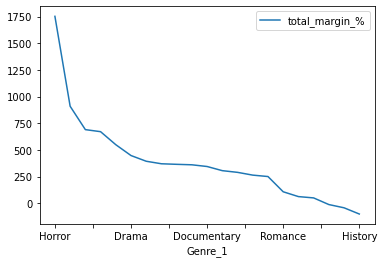

In [74]:
genre_financials.plot(y='total_margin_%')


In [76]:
# X = ['Group A','Group B','Group C','Group D']
# Ygirls = [10,20,20,40]
# Zboys = [20,30,25,30]
  
# X_axis = np.arange(len(X))
  
# plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Girls')
# plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Boys')
  
# plt.xticks(X_axis, X)
# plt.xlabel("Groups")
# plt.ylabel("Number of Students")
# plt.title("Number of Students in each group")
# plt.legend()
# plt.show()

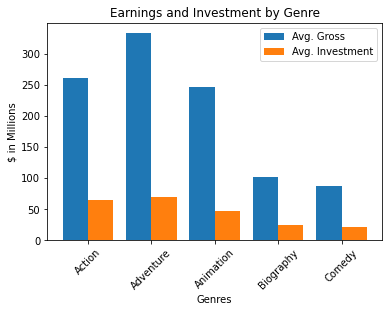

In [89]:
X = list(genre_financials.head(5).index)
Y = genre_financials.head(5)['total_gross']
Z = genre_financials.head(5)['production_budget']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.4, label = 'Avg. Gross')
plt.bar(X_axis + 0.2, Z, 0.4, label = 'Avg. Investment')
  
plt.xticks(X_axis, X)
plt.xticks(rotation = 45)
plt.xlabel("Genres")
plt.ylabel("$ in Millions")
plt.title("Earnings and Investment by Genre")
plt.legend()
plt.show()

In [ ]:
#### Try looking at the median values as well. Need to justify why you chose what. 

### Moving on to International Margins 

####  1) Need to look at the popularity of genres internationally
####  2) Need to show the economic benefit of having international pictures 

In [93]:
movie_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [ ]:
#### Join movie_akas to movie_basics on movie_id. Use this to bring in genres. 
#### Need to figure out methodology for marking a movie as international 
#### Can use SQL query. Join on movie_id, CASE WHEN 

In [92]:
# check how many unique movies are in movie_akas

movie_akas.nunique()

movie_id             122302
ordering                 61
title                252781
region                  213
language                 76
types                    10
attributes               77
is_original_title         2
dtype: int64

In [102]:
set(movie_akas['region'].unique())

{'AD',
 'AE',
 'AF',
 'AG',
 'AI',
 'AL',
 'AM',
 'AN',
 'AO',
 'AQ',
 'AR',
 'AS',
 'AT',
 'AU',
 'AW',
 'AZ',
 'BA',
 'BB',
 'BD',
 'BE',
 'BF',
 'BG',
 'BH',
 'BI',
 'BJ',
 'BM',
 'BN',
 'BO',
 'BR',
 'BS',
 'BT',
 'BUMM',
 'BY',
 'BZ',
 'CA',
 'CD',
 'CF',
 'CG',
 'CH',
 'CI',
 'CL',
 'CM',
 'CN',
 'CO',
 'CR',
 'CSHH',
 'CSXX',
 'CU',
 'CV',
 'CY',
 'CZ',
 'DE',
 'DK',
 'DM',
 'DO',
 'DZ',
 'EC',
 'EE',
 'EG',
 'EH',
 'ER',
 'ES',
 'ET',
 'FI',
 'FJ',
 'FO',
 'FR',
 'GA',
 'GB',
 'GE',
 'GH',
 'GL',
 'GM',
 'GP',
 'GR',
 'GT',
 'GU',
 'GW',
 'HK',
 'HN',
 'HR',
 'HT',
 'HU',
 'ID',
 'IE',
 'IL',
 'IM',
 'IN',
 'IQ',
 'IR',
 'IS',
 'IT',
 'JM',
 'JO',
 'JP',
 'KE',
 'KG',
 'KH',
 'KN',
 'KP',
 'KR',
 'KW',
 'KY',
 'KZ',
 'LA',
 'LB',
 'LC',
 'LI',
 'LK',
 'LR',
 'LS',
 'LT',
 'LU',
 'LV',
 'LY',
 'MA',
 'MC',
 'MD',
 'ME',
 'MG',
 'MH',
 'MK',
 'ML',
 'MM',
 'MN',
 'MO',
 'MQ',
 'MR',
 'MT',
 'MU',
 'MV',
 'MW',
 'MX',
 'MY',
 'MZ',
 'NC',
 'NE',
 'NG',
 'NI',
 'NL',
 'NO',
 'NP',


In [95]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [96]:
movie_basics.nunique()

movie_id           146144
primary_title      136071
original_title     137773
start_year             19
runtime_minutes       367
genres               1085
dtype: int64

In [105]:
movie_akas.isna().sum()

movie_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

In [ ]:
# Need to join movies_agg with movie_akas (changed with CASE WHEN to indicate international)

In [112]:
international_movies = pd.read_sql_query('''
WITH movies AS

(

SELECT  
movie_id
, title
, CASE WHEN region = 'US' THEN 'Domestic'
       WHEN region IS NULL THEN 'Unknown'
       ELSE 'International' END AS int_status

FROM movie_akas

)

, domestic AS (

SELECT DISTINCT 
movie_id

FROM movies

WHERE 
int_status = 'Domestic'
)

, international AS (

SELECT DISTINCT 
movie_id

FROM movies

WHERE
int_status = 'International'

)

SELECT DISTINCT 
movie_id

FROM domestic

WHERE movie_id in (SELECT DISTINCT movie_id FROM international)

''',conn)

international_movies

,movie_id
0,tt0369610
1,tt0401729
2,tt1014759
3,tt10446418
4,tt1182315
...,...
10851,tt9310460
10852,tt9358044
10853,tt9562694
10854,tt9705860


In [113]:
# We found 10.8K movies that were shown both in the US and at least one region outside of the US

#### Now it's time to join international movies to movies_agg

In [114]:
movies_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73413 entries, 0 to 73855
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_id        73413 non-null  object 
 1   primary_title   73413 non-null  object 
 2   original_title  73413 non-null  object 
 3   genres          73413 non-null  object 
 4   start_year      73413 non-null  int64  
 5   averagerating   73413 non-null  float64
 6   numvotes        73413 non-null  int64  
 7   total_weight    73413 non-null  float64
 8   Genre_1         73413 non-null  object 
 9   Genre_2         73413 non-null  object 
 10  Genre_3         73413 non-null  object 
 11  clean_title     73413 non-null  object 
 12  clean_title_2   73413 non-null  object 
 13  year_title      73413 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 8.4+ MB


In [133]:
int_genres = international_movies.merge(movies_agg,how='left',left_on='movie_id',right_on='movie_id')

# dropping movies without genre information, small subset 655/10.8K. Regardless doesn't help answer question

int_genres.dropna(inplace=True)


int_genres.head(10)

# Now with this information, need to find the most popular genres by rating
# Try just doing it on 'genres' to see if it tells the story 

,movie_id,primary_title,original_title,genres,start_year,averagerating,numvotes,total_weight,Genre_1,Genre_2,Genre_3,clean_title,clean_title_2,year_title
0,tt0369610,Jurassic World,Jurassic World,"Action,Adventure,Sci-Fi",2015.0,7.0,539338.0,3775366.0,Action,Adventure,Sci-Fi,jurassicworld,jurassicworld,2015jurassicworld
1,tt0401729,John Carter,John Carter,"Action,Adventure,Sci-Fi",2012.0,6.6,241792.0,1595827.2,Action,Adventure,Sci-Fi,johncarter,johncarter,2012johncarter
2,tt1014759,Alice in Wonderland,Alice in Wonderland,"Adventure,Family,Fantasy",2010.0,6.5,358813.0,2332284.5,Adventure,Family,Fantasy,aliceinwonderland,aliceinwonderland,2010aliceinwonderland
4,tt1182315,Dark Buenos Aires,Negro Buenos Aires,Thriller,2010.0,3.4,123.0,418.2,Thriller,N/A,N/A,darkbuenosaires,negrobuenosaires,2010negrobuenosaires
5,tt1194173,The Bourne Legacy,The Bourne Legacy,"Action,Adventure,Thriller",2012.0,6.7,268678.0,1800142.6,Action,Adventure,Thriller,thebournelegacy,thebournelegacy,2012thebournelegacy
6,tt1219289,Limitless,Limitless,"Mystery,Sci-Fi,Thriller",2011.0,7.4,492490.0,3644426.0,Mystery,Sci-Fi,Thriller,limitless,limitless,2011limitless
7,tt1220221,Motherland,Motherland,Documentary,2010.0,8.0,63.0,504.0,Documentary,N/A,N/A,motherland,motherland,2010motherland
8,tt1223236,African Cats,African Cats,"Adventure,Documentary",2011.0,7.6,5784.0,43958.4,Adventure,Documentary,N/A,africancats,africancats,2011africancats
9,tt1227927,Caller ID: Entity,Caller ID,"Sci-Fi,Thriller",2010.0,4.2,179.0,751.8,Sci-Fi,Thriller,N/A,calleridentity,callerid,2010callerid
10,tt1233259,Captain Thunder,El Capitán Trueno y el Santo Grial,Adventure,2011.0,2.9,521.0,1510.9,Adventure,N/A,N/A,captainthunder,elcapitántruenoyelsantogrial,2011elcapitántruenoyelsantogrial


In [351]:
int_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10201 entries, 0 to 10853
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie_id          10201 non-null  object 
 1   primary_title     10201 non-null  object 
 2   original_title    10201 non-null  object 
 3   genres            10201 non-null  object 
 4   start_year        10201 non-null  float64
 5   averagerating     10201 non-null  float64
 6   numvotes          10201 non-null  float64
 7   total_weight      10201 non-null  float64
 8   Genre_1           10201 non-null  object 
 9   Genre_2           10201 non-null  object 
 10  Genre_3           10201 non-null  object 
 11  clean_title       10201 non-null  object 
 12  clean_title_2     10201 non-null  object 
 13  year_title        10201 non-null  object 
 14  total_weight_adj  10201 non-null  float64
dtypes: float64(5), object(10)
memory usage: 1.2+ MB


In [140]:
int_genres['total_weight_adj'] = int_genres['total_weight'].map(lambda x: x/1000)

int_genres['total_weight_adj'].describe()

count    10201.000000
mean       151.589951
std        596.116996
min          0.014000
25%          1.008200
50%          5.369000
75%         36.030600
max      16201.380800
Name: total_weight_adj, dtype: float64

In [149]:
int_genres['total_weight_adj'].median()

5.369

In [161]:
int_genres_weight = pd.DataFrame(int_genres.groupby(by='genres').sum().sort_values(by='total_weight_adj',ascending=False))

In [162]:
int_genres_weight

,start_year,averagerating,numvotes,total_weight,total_weight_adj
genres,,,,,
"Action,Adventure,Sci-Fi",163206.0,476.0,22877297.0,166630322.1,166630.3221
"Action,Adventure,Fantasy",124909.0,344.5,9611647.0,64182838.8,64182.8388
"Adventure,Animation,Comedy",269934.0,811.9,8559129.0,61369240.4,61369.2404
"Action,Adventure,Comedy",189400.0,486.2,7102910.0,51624705.5,51624.7055
"Comedy,Drama,Romance",567891.0,1705.0,6583516.0,44895791.2,44895.7912
...,...,...,...,...,...
"Animation,Drama,Music",2019.0,6.7,7.0,46.9,0.0469
"Adventure,Family,Horror",2011.0,4.8,9.0,43.2,0.0432
"Adventure,Documentary,Music",2016.0,8.0,5.0,40.0,0.0400


In [166]:
int_genres_weight.head(5).index.values

array(['Action,Adventure,Sci-Fi', 'Action,Adventure,Fantasy',
       'Adventure,Animation,Comedy', 'Action,Adventure,Comedy',
       'Comedy,Drama,Romance'], dtype=object)

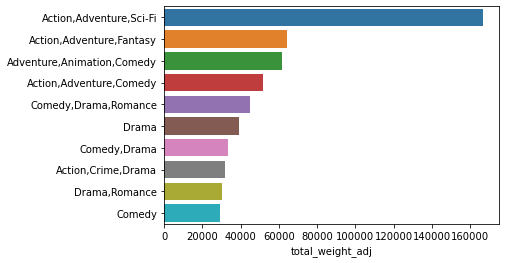

In [169]:
sns.barplot(x=int_genres_weight['total_weight_adj'].head(10),y=int_genres_weight.head(10).index.values,orient='h');

In [142]:
import seaborn as sns

<AxesSubplot:xlabel='total_weight_adj', ylabel='Count'>

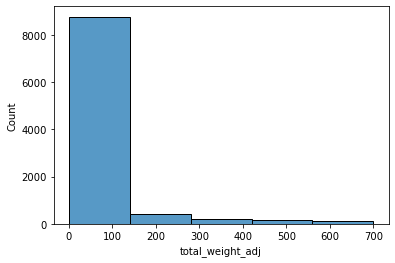

In [148]:
sns.histplot(x=int_genres['total_weight_adj'],bins=5,binrange=(0,700))

In [217]:
example_movies = pd.DataFrame(movie_budget[['movie','production_budget','domestic_margin_$','domestic_margin_%','total_margin_$','total_margin_%']].head(10))

example_movies.iloc[[0,3,4,5,6,7]]

,movie,production_budget,domestic_margin_$,domestic_margin_%,total_margin_$,total_margin_%
0,Avatar,425000000.0,-335507625.0,-78.942971,3.111853e+09,732.200683
3,Avengers: Age of Ultron,330600000.0,-128405868.0,-38.840250,1.531420e+09,463.224389
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,-303181382.0,-95.640815,1.619903e+09,511.010451
5,Star Wars Ep. VII: The Force Awakens,306000000.0,-630662225.0,-206.098766,2.683973e+09,877.115505
6,Avengers: Infinity War,300000000.0,-378815482.0,-126.271827,2.426950e+09,808.983227
7,Pirates of the Caribbean: At Worldâs End,300000000.0,-9420425.0,-3.140142,9.728408e+08,324.280283


In [155]:
### use the above int genres groupby data to show the most popular genres int are in fact action and adventure

## Studios - Find a studio to acquire that makes horror films
### Objective: Show profit potential, and avg. cost of investment versus other genres 
###  Nice to have: show popularity of genres over years 

In [187]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   total_gross        5782 non-null   float64
 7   total_margin_$     5782 non-null   float64
 8   total_margin_%     5782 non-null   float64
 9   domestic_margin_$  5782 non-null   float64
 10  domestic_margin_%  5782 non-null   float64
 11  clean_title        5782 non-null   object 
 12  release_year       5782 non-null   object 
 13  year_title         5782 non-null   object 
dtypes: float64(8), int64(1), object(5)
memory usage: 632.5+ KB


In [185]:
#PART 1
### Need to isolate movie title and studio into new df CALLED studio_movies
### With new df, join  to movies_agg
### From joined table, identify studios with highest number of horror films. Visualize

#PART 2
### Using the movie_budget table, figure out economics of chosen studios 
### Economics include avg. investment cost per movie, avg. ROI 


### PART 1 - Join movie_budget to movies_agg

In [223]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [226]:
studio_gross = pd.DataFrame(movie_gross.groupby(by=['studio']).mean().sort_values(by='domestic_gross',ascending=False))

In [246]:
studio_movies = pd.DataFrame(movie_gross[['title','studio','year']])

In [247]:
studio_movies.head()

,title,studio,year
0,Toy Story 3,BV,2010
1,Alice in Wonderland (2010),BV,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,2010
3,Inception,WB,2010
4,Shrek Forever After,P/DW,2010


In [244]:
### Need to clean titles for join. Due to years in some titles, will need to 
### 1) Clean titles - lowercase, no space 
### 2) Concatenate first 5 characters of title, with the year
### 3) Do the same on movies_agg for join 

In [248]:
studio_movies['clean_title'] = studio_movies['title'].map(lambda x: x.lower())

In [250]:
studio_movies['clean_title'] = studio_movies['clean_title'].map(lambda x: x.replace(' ',''))

In [257]:
studio_movies['clean_title'][0][0:5]

'toyst'

In [258]:
studio_movies['clean_title'] = studio_movies['clean_title'].map(lambda x: x[0:5])

In [260]:
studio_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        3387 non-null   object
 1   studio       3382 non-null   object
 2   year         3387 non-null   int64 
 3   clean_title  3387 non-null   object
dtypes: int64(1), object(3)
memory usage: 106.0+ KB


In [261]:
studio_movies['clean_title'] = studio_movies['year'].astype(str) + studio_movies['clean_title'] 

In [265]:
studio_movies.nunique()

title          3386
studio          257
year              9
clean_title    3104
dtype: int64

In [275]:
# drop dupes by clean title

studio_movies.drop_duplicates(subset='clean_title',inplace=True)


# drop null studio 

studio_movies.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3104 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        3104 non-null   object
 1   studio       3099 non-null   object
 2   year         3104 non-null   int64 
 3   clean_title  3104 non-null   object
dtypes: int64(1), object(3)
memory usage: 121.2+ KB


In [276]:
studio_movies.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 3099 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        3099 non-null   object
 1   studio       3099 non-null   object
 2   year         3099 non-null   int64 
 3   clean_title  3099 non-null   object
dtypes: int64(1), object(3)
memory usage: 121.1+ KB


In [282]:
#Now need to clean titles in movies_agg, save to new column
# Take first 9 characters of year_title, since its already been cleaned (year is 4 char, plus 5 to join)

movies_agg['year_title'][0][0:9]

'2010incep'

In [283]:
movies_agg['year_title_short'] = movies_agg['year_title'].map(lambda x: x[0:9])

In [296]:
horror = 'Horror'

In [297]:
movies_agg['is_horror'] = movies_agg['genres'].map(lambda x: horror in x)

In [310]:
horror_movies = pd.DataFrame(movies_agg[movies_agg['is_horror'] == True])

In [313]:
horror_studios = studio_movies.merge(horror_movies,how='left',left_on='clean_title',right_on='year_title_short')

In [315]:
horror_studios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3539 entries, 0 to 3538
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             3539 non-null   object 
 1   studio            3539 non-null   object 
 2   year              3539 non-null   int64  
 3   clean_title_x     3539 non-null   object 
 4   movie_id          1012 non-null   object 
 5   primary_title     1012 non-null   object 
 6   original_title    1012 non-null   object 
 7   genres            1012 non-null   object 
 8   start_year        1012 non-null   float64
 9   averagerating     1012 non-null   float64
 10  numvotes          1012 non-null   float64
 11  total_weight      1012 non-null   float64
 12  Genre_1           1012 non-null   object 
 13  Genre_2           1012 non-null   object 
 14  Genre_3           1012 non-null   object 
 15  clean_title_y     1012 non-null   object 
 16  clean_title_2     1012 non-null   object 


In [316]:
horror_studios.dropna(inplace=True)
#dropping nulls because those are non-horror

In [341]:
horror_studios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1012 entries, 1 to 3536
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             1012 non-null   object 
 1   studio            1012 non-null   object 
 2   year              1012 non-null   int64  
 3   clean_title_x     1012 non-null   object 
 4   movie_id          1012 non-null   object 
 5   primary_title     1012 non-null   object 
 6   original_title    1012 non-null   object 
 7   genres            1012 non-null   object 
 8   start_year        1012 non-null   float64
 9   averagerating     1012 non-null   float64
 10  numvotes          1012 non-null   float64
 11  total_weight      1012 non-null   float64
 12  Genre_1           1012 non-null   object 
 13  Genre_2           1012 non-null   object 
 14  Genre_3           1012 non-null   object 
 15  clean_title_y     1012 non-null   object 
 16  clean_title_2     1012 non-null   object 


In [321]:
horror_studios[horror_studios['studio'] == 'BH Tilt']

,title,studio,year,clean_title_x,movie_id,primary_title,original_title,genres,start_year,averagerating,numvotes,total_weight,Genre_1,Genre_2,Genre_3,clean_title_y,clean_title_2,year_title,year_title_short,is_horror
2149,The Green Inferno,BH Tilt,2015,2015thegr,tt3712588,The Grid: Zombie Outlet Maul,The Grid: Zombie Outlet Maul,"Animation,Comedy,Horror",2015.0,4.6,14.0,64.4,Animation,Comedy,Horror,thegridzombieoutletmaul,thegridzombieoutletmaul,2015thegridzombieoutletmaul,2015thegr,True
2150,The Green Inferno,BH Tilt,2015,2015thegr,tt4619830,The Grayhaven Maniac,The Grayhaven Maniac,Horror,2015.0,4.0,5.0,20.0,Horror,N/A,N/A,thegrayhavenmaniac,thegrayhavenmaniac,2015thegrayhavenmaniac,2015thegr,True
2597,The Darkness,BH Tilt,2016,2016theda,tt1878841,The Darkness,The Darkness,"Horror,Thriller",2016.0,4.4,12435.0,54714.0,Horror,Thriller,N/A,thedarkness,thedarkness,2016thedarkness,2016theda,True
2598,The Darkness,BH Tilt,2016,2016theda,tt5068650,The Dark Tapes,The Dark Tapes,"Horror,Mystery,Sci-Fi",2016.0,4.8,2282.0,10953.6,Horror,Mystery,Sci-Fi,thedarktapes,thedarktapes,2016thedarktapes,2016theda,True
2613,Incarnate,BH Tilt,2016,2016incar,tt3216348,Incarnate,Incarnate,"Horror,Thriller",2016.0,5.3,10217.0,54150.1,Horror,Thriller,N/A,incarnate,incarnate,2016incarnate,2016incar,True
3364,Unfriended: Dark Web,BH Tilt,2018,2018unfri,tt4761916,Unfriended: Dark Web,Unfriended: Dark Web,"Crime,Horror,Mystery",2018.0,5.9,13822.0,81549.8,Crime,Horror,Mystery,unfriendeddarkweb,unfriendeddarkweb,2018unfriendeddarkweb,2018unfri,True


In [345]:
movies_agg.head(5)

,movie_id,primary_title,original_title,genres,start_year,averagerating,numvotes,total_weight,Genre_1,Genre_2,Genre_3,clean_title,clean_title_2,year_title,year_title_short,is_horror
0,tt1375666,Inception,Inception,"Action,Adventure,Sci-Fi",2010,8.8,1841066,16201380.8,Action,Adventure,Sci-Fi,inception,inception,2010inception,2010incep,False
1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,"Action,Thriller",2012,8.4,1387769,11657259.6,Action,Thriller,N/A,thedarkknightrises,thedarkknightrises,2012thedarkknightrises,2012theda,False
2,tt0816692,Interstellar,Interstellar,"Adventure,Drama,Sci-Fi",2014,8.6,1299334,11174272.4,Adventure,Drama,Sci-Fi,interstellar,interstellar,2014interstellar,2014inter,False
3,tt1853728,Django Unchained,Django Unchained,"Drama,Western",2012,8.4,1211405,10175802.0,Drama,Western,N/A,djangounchained,djangounchained,2012djangounchained,2012djang,False
4,tt0848228,The Avengers,The Avengers,"Action,Adventure,Sci-Fi",2012,8.1,1183655,9587605.5,Action,Adventure,Sci-Fi,theavengers,theavengers,2012theavengers,2012theav,False


In [347]:
horror_financials = horror_studios.merge(movie_budget,how='left',left_on='year_title',right_on='year_title')
horror_financials.info()

title                572
studio               112
year                   9
clean_title_x        572
movie_id_x          1012
primary_title_x      998
original_title_x     999
genres_x              70
start_year_x           9
averagerating_x       67
numvotes_x           606
total_weight_x       933
Genre_1_x             12
Genre_2_x             17
Genre_3_x              9
clean_title_y        998
clean_title_2_x      999
year_title_x        1012
year_title_short     572
is_horror_x            1
movie_id_y          3809
primary_title_y     3703
original_title_y    3695
genres_y             397
start_year_y           9
averagerating_y       85
numvotes_y          1418
total_weight_y      2775
Genre_1_y             22
Genre_2_y             22
Genre_3_y             21
clean_title         3698
clean_title_2_y     3689
year_title_y        3809
is_horror_y            2
dtype: int64